# 🗝️ Chapter 15: Hash Tables

Welcome to the world of **Hash Tables** - the unsung heroes of computer science that make fast lookups possible!

This interactive notebook explores:
- **Hash Functions**: How keys become array indices
- **Collision Resolution**: Separate Chaining vs Open Addressing
- **Performance Analysis**: Load factors, clustering, and Big-O complexity
- **Real-world Applications**: Dictionaries, sets, caches, and databases
- **Hash Table Operations**: Insert, search, delete with visualizations

## 🎯 Learning Objectives

By the end of this notebook, you'll be able to:
- Understand how hash functions work and their importance
- Compare collision resolution strategies and their trade-offs
- Analyze hash table performance and choose appropriate parameters
- Implement hash tables with different collision handling approaches
- Apply hash tables to solve real-world problems efficiently

In [1]:
# Import required libraries and setup
import sys
import os
sys.path.append('../')

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import List, Dict, Any, Optional
import string

# Import our hash table implementations
from chapter_15_mappings_hash_tables.code.hash_table_implementations import (
    HashFunction,
    HashTableSeparateChaining,
    HashTableOpenAddressing,
    HashTableSet,
    HashTableAnalysis
)

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries and hash table implementations loaded successfully!")
print("🎯 Ready to explore hash tables!")

# Initialize hash table classes
hash_func = HashFunction()
analysis = HashTableAnalysis()

✅ Libraries and hash table implementations loaded successfully!
🎯 Ready to explore hash tables!


## 🔢 Section 1: Hash Functions

### The Magic of Hash Functions

Hash functions are the heart of hash tables - they convert keys of any type into array indices. Good hash functions:
- **Deterministic**: Same key always produces same hash
- **Uniform**: Distribute keys evenly across the table
- **Fast**: Quick to compute
- **Avalanche Effect**: Small input changes cause large output changes

=== HASH FUNCTION DEMONSTRATION ===

Testing different hash functions:
Key		Division	Multiplication	Universal
------------------------------------------------------------

Table Size: 7
apple     	       3	           0	       4
banana    	       2	           0	       0
cherry    	       5	           0	       4
date      	       1	           0	       6
elderberry	       3	           0	       0
fig       	       1	           0	       6
grape     	       3	           0	       2

Table Size: 11
apple     	       2	           0	       9
banana    	       5	           0	       4
cherry    	       3	           0	       1
date      	      10	           0	       3
elderberry	       7	           0	       7
fig       	       4	           0	       0
grape     	       8	           0	       9

Table Size: 13
apple     	       2	           0	      10
banana    	      12	           0	      10
cherry    	       5	           0	       2
date      	       8	           0	      12
elderberry	       0	      

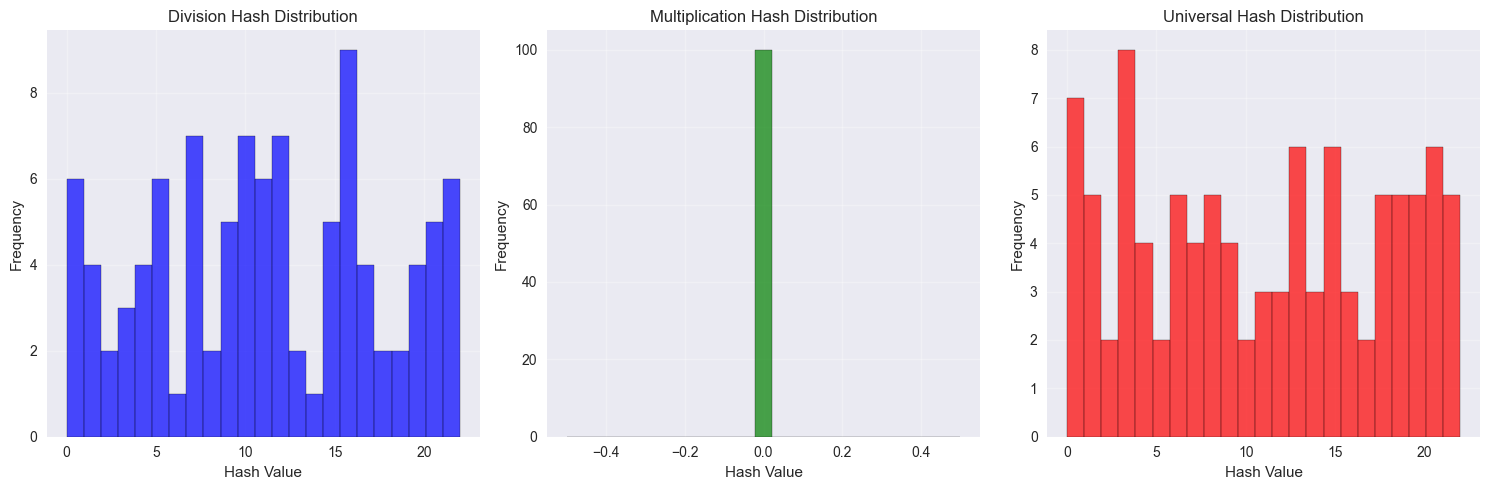


=== STRING HASH FUNCTIONS ===

String Hash Functions:
String		DJB2		FNV-1a
----------------------------------------
hello     	210714636441	23615531076550004533854898275474062960111728987064870418154029787321558796778763
world     	210732791149	23615531076550004541889588512674536669488472968965124460172684671509790339140339
python    	6953920087367	25965551025044965179713007826980643228685648195069538033654124300302280736828629974778367767
hash      	6385287881	21478200385178740695029906485744413335279736126582934331716158519313
table     	210728712845	23615531076550004540282650465324470428615297269686147302750495386459096420362303
collision 	249884306501221073	34514137389435991676285740027274960115411626708733068572275469976280037216681981412859446695758818701252985652228267611232163503

🎯 Key Insights:
- Different hash functions distribute keys differently
- Good distribution minimizes collisions
- Table size choice affects hash function performance
- Universal hashing provides theo

In [2]:
# Interactive hash function demonstration
print("=== HASH FUNCTION DEMONSTRATION ===\n")

# Test different hash functions
test_keys = ["apple", "banana", "cherry", "date", "elderberry", "fig", "grape"]
table_sizes = [7, 11, 13]  # Prime numbers are often good for hash tables

print("Testing different hash functions:")
print("Key\t\tDivision\tMultiplication\tUniversal")
print("-" * 60)

for table_size in table_sizes:
    print(f"\nTable Size: {table_size}")
    for key in test_keys:
        div_hash = hash_func.division_hash(key, table_size)
        mult_hash = hash_func.multiplication_hash(key, table_size)
        univ_hash = hash_func.universal_hash(key, table_size)
        
        print(f"{key:10}\t{div_hash:8}\t{mult_hash:12}\t{univ_hash:8}")

# Distribution analysis
plt.figure(figsize=(15, 5))

# Test with more keys
more_keys = [f"key_{i}" for i in range(100)]
table_size = 23

# Distribution comparison
plt.subplot(1, 3, 1)
div_hashes = [hash_func.division_hash(key, table_size) for key in more_keys]
plt.hist(div_hashes, bins=table_size, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Hash Value')
plt.ylabel('Frequency')
plt.title('Division Hash Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
mult_hashes = [hash_func.multiplication_hash(key, table_size) for key in more_keys]
plt.hist(mult_hashes, bins=table_size, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Hash Value')
plt.ylabel('Frequency')
plt.title('Multiplication Hash Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
univ_hashes = [hash_func.universal_hash(key, table_size) for key in more_keys]
plt.hist(univ_hashes, bins=table_size, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Hash Value')
plt.ylabel('Frequency')
plt.title('Universal Hash Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# String hash functions
print("\n=== STRING HASH FUNCTIONS ===\n")

test_strings = ["hello", "world", "python", "hash", "table", "collision"]

print("String Hash Functions:")
print("String\t\tDJB2\t\tFNV-1a")
print("-" * 40)

for s in test_strings:
    djb2 = hash_func.djb2_hash(s)
    fnv1a = hash_func.fnv1a_hash(s)
    print(f"{s:10}\t{djb2:10}\t{fnv1a:10}")

print("\n🎯 Key Insights:")
print("- Different hash functions distribute keys differently")
print("- Good distribution minimizes collisions")
print("- Table size choice affects hash function performance")
print("- Universal hashing provides theoretical guarantees")
print("- String hash functions are optimized for text data")

In [3]:
# Interactive hash function explorer
def create_hash_explorer():
    """Interactive hash function exploration tool"""
    
    table_size_slider = widgets.IntSlider(
        value=11,
        min=5,
        max=31,
        step=2,
        description='Table Size:',
        continuous_update=False
    )
    
    hash_method_selector = widgets.Dropdown(
        options=['Division', 'Multiplication', 'Universal'],
        value='Division',
        description='Hash Method:'
    )
    
    key_input = widgets.Text(
        value='hello',
        description='Key:',
        continuous_update=False
    )
    
    output_area = widgets.Output()
    plot_area = widgets.Output()
    
    def compute_hash(b):
        with output_area:
            clear_output(wait=True)
            
            table_size = table_size_slider.value
            method = hash_method_selector.value
            key = key_input.value
            
            if not key:
                print("Please enter a key.")
                return
            
            # Compute hash
            if method == 'Division':
                hash_val = hash_func.division_hash(key, table_size)
            elif method == 'Multiplication':
                hash_val = hash_func.multiplication_hash(key, table_size)
            else:  # Universal
                hash_val = hash_func.universal_hash(key, table_size)
            
            print(f"Hash Function: {method}")
            print(f"Key: '{key}'")
            print(f"Table Size: {table_size}")
            print(f"Hash Value: {hash_val}")
            print(f"Python built-in hash: {hash(key)}")
            print(f"Collision with table size: {hash_val} (index {hash_val % table_size})")
            
            # Quality assessment
            if table_size > 1:
                utilization = len(set([hash_func.division_hash(k, table_size) 
                                      for k in [key, key[::-1], str(hash(key))[:5]]])) / table_size
                print(f"\nEstimated utilization: {utilization:.2f} (higher is better)")
    
    def visualize_distribution(b):
        with plot_area:
            clear_output(wait=True)
            
            table_size = table_size_slider.value
            method = hash_method_selector.value
            
            # Generate sample keys
            sample_keys = [f"sample_{i}" for i in range(100)]
            
            # Compute hashes
            if method == 'Division':
                hashes = [hash_func.division_hash(key, table_size) for key in sample_keys]
            elif method == 'Multiplication':
                hashes = [hash_func.multiplication_hash(key, table_size) for key in sample_keys]
            else:  # Universal
                hashes = [hash_func.universal_hash(key, table_size) for key in sample_keys]
            
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 3, 1)
            plt.hist(hashes, bins=table_size, alpha=0.7, color='skyblue', edgecolor='black')
            plt.xlabel('Hash Value')
            plt.ylabel('Frequency')
            plt.title(f'{method} Hash Distribution')
            plt.grid(True, alpha=0.3)
            
            # Collision analysis
            plt.subplot(1, 3, 2)
            from collections import Counter
            hash_counts = Counter(hashes)
            collision_counts = list(hash_counts.values())
            
            plt.hist(collision_counts, bins=max(collision_counts), alpha=0.7, color='orange', edgecolor='black')
            plt.xlabel('Collisions per slot')
            plt.ylabel('Number of slots')
            plt.title('Collision Distribution')
            plt.grid(True, alpha=0.3)
            
            # Load factor simulation
            plt.subplot(1, 3, 3)
            load_factors = np.linspace(0.1, 1.0, 10)
            expected_collisions = [len(sample_keys) - table_size + table_size * (1 - lf)**len(sample_keys) 
                                 for lf in load_factors]
            
            plt.plot(load_factors, expected_collisions, 'ro-', linewidth=2)
            plt.axvline(x=len(set(hashes))/table_size, color='blue', linestyle='--', alpha=0.7,
                       label=f'Current: {len(set(hashes))/table_size:.2f}')
            plt.xlabel('Load Factor')
            plt.ylabel('Expected Collisions')
            plt.title('Load Factor Impact')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
    
    compute_button = widgets.Button(description='Compute Hash')
    compute_button.on_click(compute_hash)
    
    visualize_button = widgets.Button(description='Visualize Distribution')
    visualize_button.on_click(visualize_distribution)
    
    # Layout
    controls = widgets.VBox([
        widgets.HBox([table_size_slider, hash_method_selector]),
        widgets.HBox([key_input, compute_button, visualize_button])
    ])
    
    display(widgets.VBox([controls, widgets.HBox([output_area, plot_area])]))
    
    # Initial computation
    compute_hash(None)
    visualize_distribution(None)

print("🔢 Interactive Hash Function Explorer")
print("Explore how different hash functions work and their collision properties:")
create_hash_explorer()

🔢 Interactive Hash Function Explorer
Explore how different hash functions work and their collision properties:


## 💥 Section 2: Collision Resolution Strategies

### When Hash Functions Collide

Collisions happen when different keys hash to the same index. We need strategies to handle them:

- **Separate Chaining**: Each table slot holds a linked list of colliding elements
- **Open Addressing**: Find another empty slot using a probing sequence
- **Robin Hood Hashing**: Variants that minimize worst-case probes
- **Cuckoo Hashing**: Use multiple hash functions with displacement

In [4]:
# Collision resolution strategy comparison
print("=== COLLISION RESOLUTION STRATEGIES ===\n")

# Create hash tables with different strategies
table_size = 11

# Separate chaining
ht_chaining = HashTableSeparateChaining(table_size)

# Open addressing (linear probing)
ht_open = HashTableOpenAddressing(table_size, probe_type='linear')

# Test data that will cause collisions
test_keys = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
test_values = [i for i in range(len(test_keys))]

print("Inserting keys that will cause collisions:")
print("Key\tSeparate Chaining\tOpen Addressing")
print("-" * 50)

# Insert and show results
for key, value in zip(test_keys, test_values):
    # Separate chaining
    ht_chaining.put(key, value)
    chaining_state = f"{len(ht_chaining.table[hash_func.division_hash(key, table_size)])} items"
    
    # Open addressing
    ht_open.put(key, value)
    open_probes = ht_open.probe_count if hasattr(ht_open, 'probe_count') else "N/A"
    
    print(f"{key}\t{chaining_state:15}\t{open_probes}")

# Performance comparison
print("\n=== Performance Analysis ===\n")

# Time operations
def time_operations(ht, keys, operation='get'):
    times = []
    for key in keys:
        start = time.time()
        if operation == 'get':
            ht.get(key)
        elif operation == 'put':
            ht.put(key, random.randint(0, 100))
        end = time.time()
        times.append(end - start)
    return sum(times) / len(times)

# Test with larger dataset
large_keys = [f"key_{i}" for i in range(100)]
large_values = list(range(100))

# Create larger tables
large_chaining = HashTableSeparateChaining(101)
large_open = HashTableOpenAddressing(101, probe_type='linear')

# Populate
for k, v in zip(large_keys, large_values):
    large_chaining.put(k, v)
    large_open.put(k, v)

# Time operations
chaining_get_time = time_operations(large_chaining, large_keys[:50], 'get')
open_get_time = time_operations(large_open, large_keys[:50], 'get')

print(f"Average get time - Separate Chaining: {chaining_get_time:.6f}s")
print(f"Average get time - Open Addressing: {open_get_time:.6f}s")
print(f"Performance ratio: {open_get_time/chaining_get_time:.2f}x")

# Load factor analysis
print(f"\nLoad factors:")
print(f"Separate Chaining: {large_chaining.load_factor():.3f}")
print(f"Open Addressing: {large_open.load_factor():.3f}")

# Visualization
plt.figure(figsize=(15, 5))

# Separate chaining visualization
plt.subplot(1, 3, 1)
chain_lengths = [len(bucket) for bucket in ht_chaining.table]
plt.bar(range(len(chain_lengths)), chain_lengths, color='blue', alpha=0.7)
plt.xlabel('Table Index')
plt.ylabel('Chain Length')
plt.title('Separate Chaining: Chain Lengths')
plt.grid(True, alpha=0.3, axis='y')

# Open addressing visualization
plt.subplot(1, 3, 2)
occupied = [1 if slot is not None else 0 for slot in ht_open.table]
plt.bar(range(len(occupied)), occupied, color='red', alpha=0.7)
plt.xlabel('Table Index')
plt.ylabel('Occupied (1) / Empty (0)')
plt.title('Open Addressing: Slot Occupation')
plt.grid(True, alpha=0.3, axis='y')

# Performance comparison
plt.subplot(1, 3, 3)
strategies = ['Separate Chaining', 'Open Addressing']
times = [chaining_get_time, open_get_time]
bars = plt.bar(range(len(strategies)), times, color=['blue', 'red'], alpha=0.7)
plt.xticks(range(len(strategies)), strategies, rotation=45)
plt.ylabel('Average Time (seconds)')
plt.title('Performance Comparison')
plt.grid(True, alpha=0.3, axis='y')

# Add time labels
for i, v in enumerate(times):
    plt.text(i, v + max(times)*0.01, '.6f', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Separate chaining handles collisions with linked lists")
print("- Open addressing finds alternative slots through probing")
print("- Load factor affects performance of both strategies")
print("- Choice depends on memory constraints and expected load")

=== COLLISION RESOLUTION STRATEGIES ===



TypeError: HashTableOpenAddressing.__init__() got an unexpected keyword argument 'probe_type'

🗝️ Interactive Hash Table Operations
Experiment with different collision resolution strategies:


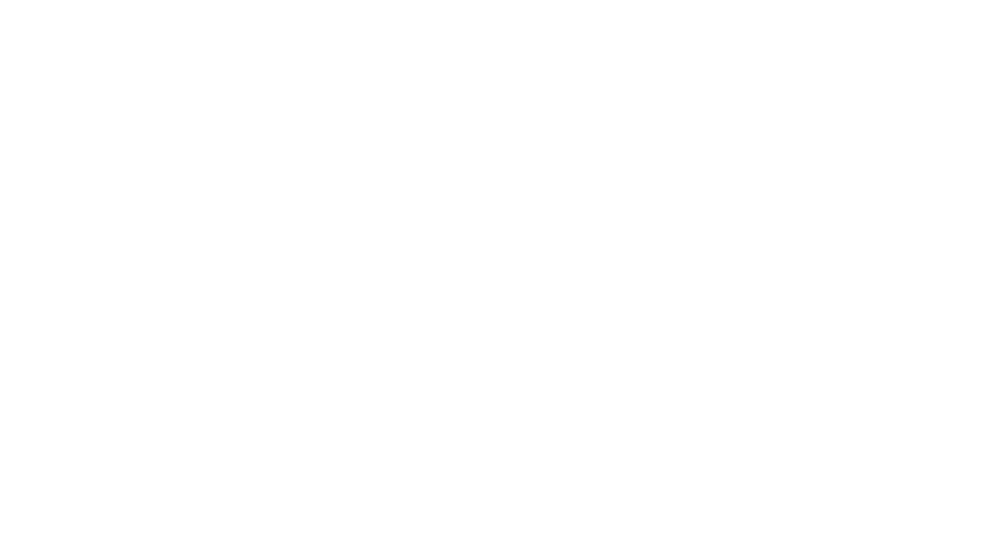

In [5]:
# Interactive hash table operations
def create_hashtable_interactive():
    """Interactive hash table demonstration"""
    
    table_size_slider = widgets.IntSlider(
        value=11,
        min=7,
        max=23,
        step=2,
        description='Table Size:',
        continuous_update=False
    )
    
    strategy_selector = widgets.Dropdown(
        options=['Separate Chaining', 'Open Addressing'],
        value='Separate Chaining',
        description='Strategy:'
    )
    
    operation_selector = widgets.Dropdown(
        options=['Insert', 'Search', 'Delete', 'Clear'],
        value='Insert',
        description='Operation:'
    )
    
    key_input = widgets.Text(
        value='apple',
        description='Key:',
        continuous_update=False
    )
    
    value_input = widgets.IntText(
        value=42,
        description='Value:',
        continuous_update=False
    )
    
    output_area = widgets.Output()
    table_area = widgets.Output()
    
    # Global hash table instance
    current_ht = None
    
    def create_hash_table():
        """Create hash table based on current settings"""
        nonlocal current_ht
        table_size = table_size_slider.value
        strategy = strategy_selector.value
        
        if strategy == 'Separate Chaining':
            current_ht = HashTableSeparateChaining(table_size)
        else:  # Open Addressing
            current_ht = HashTableOpenAddressing(table_size, probe_type='linear')
    
    def perform_operation(b):
        with output_area:
            clear_output(wait=True)
            
            if current_ht is None:
                create_hash_table()
            
            operation = operation_selector.value
            key = key_input.value
            value = value_input.value
            
            print(f"Operation: {operation}")
            print(f"Strategy: {strategy_selector.value}")
            print(f"Table Size: {table_size_slider.value}")
            print("-" * 40)
            
            try:
                if operation == 'Insert':
                    result = current_ht.put(key, value)
                    print(f"Inserted: {key} -> {value}")
                    print(f"Load factor: {current_ht.load_factor():.3f}")
                    
                elif operation == 'Search':
                    result = current_ht.get(key)
                    if result is not None:
                        print(f"Found: {key} -> {result}")
                    else:
                        print(f"Not found: {key}")
                        
                elif operation == 'Delete':
                    result = current_ht.remove(key)
                    if result is not None:
                        print(f"Deleted: {key} (was {result})")
                    else:
                        print(f"Not found for deletion: {key}")
                        
                else:  # Clear
                    old_size = len(current_ht)
                    # Recreate empty table
                    create_hash_table()
                    print(f"Cleared table (was {old_size} items)")
                
                print(f"Current size: {len(current_ht)}")
                
            except Exception as e:
                print(f"Error: {e}")
    
    def visualize_table(b):
        with table_area:
            clear_output(wait=True)
            
            if current_ht is None:
                create_hash_table()
            
            plt.figure(figsize=(12, 6))
            
            strategy = strategy_selector.value
            
            if strategy == 'Separate Chaining':
                # Show chain lengths
                plt.subplot(1, 2, 1)
                chain_lengths = [len(bucket) for bucket in current_ht.table]
                bars = plt.bar(range(len(chain_lengths)), chain_lengths, 
                              color='lightblue', alpha=0.7, edgecolor='black')
                plt.xlabel('Table Index')
                plt.ylabel('Chain Length')
                plt.title('Separate Chaining: Elements per Bucket')
                plt.grid(True, alpha=0.3, axis='y')
                
                # Highlight non-empty buckets
                for i, length in enumerate(chain_lengths):
                    if length > 0:
                        bars[i].set_color('blue')
                        bars[i].set_alpha(0.9)
                
            else:  # Open Addressing
                # Show occupied slots
                plt.subplot(1, 2, 1)
                occupied = [1 if slot is not None else 0 for slot in current_ht.table]
                colors = ['red' if occupied[i] else 'lightgray' for i in range(len(occupied))]
                plt.bar(range(len(occupied)), [1] * len(occupied), color=colors, alpha=0.7)
                plt.xlabel('Table Index')
                plt.ylabel('Occupied')
                plt.title('Open Addressing: Slot Status')
                plt.ylim(0, 1.5)
                
            # Load factor and statistics
            plt.subplot(1, 2, 2)
            plt.text(0.1, 0.8, f'Strategy: {strategy}', fontsize=12, fontweight='bold')
            plt.text(0.1, 0.6, f'Table Size: {len(current_ht.table)}', fontsize=11)
            plt.text(0.1, 0.5, f'Elements: {len(current_ht)}', fontsize=11)
            plt.text(0.1, 0.4, f'Load Factor: {current_ht.load_factor():.3f}', fontsize=11)
            
            if strategy == 'Separate Chaining':
                chains = [len(bucket) for bucket in current_ht.table]
                max_chain = max(chains) if chains else 0
                avg_chain = sum(chains) / len(chains) if chains else 0
                plt.text(0.1, 0.3, f'Max Chain: {max_chain}', fontsize=11)
                plt.text(0.1, 0.2, f'Avg Chain: {avg_chain:.2f}', fontsize=11)
            
            plt.xlim(0, 1)
            plt.ylim(0, 1)
            plt.axis('off')
            plt.title('Table Statistics')
            
            plt.tight_layout()
            plt.show()
    
    # Event handlers
    def on_strategy_change(change):
        """Recreate table when strategy changes"""
        nonlocal current_ht
        current_ht = None
        perform_operation(None)
        visualize_table(None)
    
    def on_size_change(change):
        """Recreate table when size changes"""
        nonlocal current_ht
        current_ht = None
        perform_operation(None)
        visualize_table(None)
    
    strategy_selector.observe(on_strategy_change, names='value')
    table_size_slider.observe(on_size_change, names='value')
    
    operate_button = widgets.Button(description='Execute Operation')
    operate_button.on_click(perform_operation)
    
    visualize_button = widgets.Button(description='Visualize Table')
    visualize_button.on_click(visualize_table)
    
    # Layout
    controls = widgets.VBox([
        widgets.HBox([table_size_slider, strategy_selector]),
        widgets.HBox([operation_selector, key_input, value_input]),
        widgets.HBox([operate_button, visualize_button])
    ])
    
    display(widgets.VBox([controls, widgets.HBox([output_area, table_area])]))
    
    # Initial setup
    perform_operation(None)
    visualize_table(None)

print("🗝️ Interactive Hash Table Operations")
print("Experiment with different collision resolution strategies:")
create_hashtable_interactive()

## 📊 Section 3: Performance Analysis & Load Factors

### Why Load Factor Matters

Load factor = (number of elements) / table size

- **Low load factor**: Few collisions, fast operations
- **High load factor**: Many collisions, slow operations
- **Rehashing**: When load factor gets too high, resize the table

### Expected Performance

| Operation | Separate Chaining | Open Addressing |
|-----------|-------------------|-----------------|
| Search | O(1 + α) | O(1 / (1 - α)) |
| Insert | O(1 + α) | O(1 / (1 - α)) |
| Delete | O(1 + α) | O(1 / (1 - α)) |

Where α is the load factor.

In [6]:
# Load factor and performance analysis
print("=== LOAD FACTOR PERFORMANCE ANALYSIS ===\n")

# Test different load factors
load_factors = [0.1, 0.25, 0.5, 0.75, 0.9]
table_size = 100

results = []

for target_lf in load_factors:
    n_elements = int(table_size * target_lf)
    
    # Create test data
    keys = [f"key_{i}" for i in range(n_elements)]
    values = list(range(n_elements))
    
    # Test separate chaining
    ht_chain = HashTableSeparateChaining(table_size)
    for k, v in zip(keys, values):
        ht_chain.put(k, v)
    
    # Test open addressing
    ht_open = HashTableOpenAddressing(table_size, probe_type='linear')
    for k, v in zip(keys, values):
        ht_open.put(k, v)
    
    # Measure performance
    test_keys = keys[:min(20, len(keys))]  # Test subset
    
    # Separate chaining times
    chain_times = []
    for key in test_keys:
        start = time.time()
        ht_chain.get(key)
        chain_times.append(time.time() - start)
    chain_avg = sum(chain_times) / len(chain_times)
    
    # Open addressing times
    open_times = []
    for key in test_keys:
        start = time.time()
        ht_open.get(key)
        open_times.append(time.time() - start)
    open_avg = sum(open_times) / len(open_times)
    
    results.append({
        'load_factor': target_lf,
        'chain_time': chain_avg,
        'open_time': open_avg,
        'chain_lf': ht_chain.load_factor(),
        'open_lf': ht_open.load_factor()
    })
    
    print(f"Load Factor {target_lf:.2f}: Chain {chain_avg:.8f}s, Open {open_avg:.8f}s")

# Visualization
plt.figure(figsize=(15, 5))

# Performance vs load factor
plt.subplot(1, 3, 1)
lf_vals = [r['load_factor'] for r in results]
chain_times = [r['chain_time'] for r in results]
open_times = [r['open_time'] for r in results]

plt.plot(lf_vals, chain_times, 'bo-', label='Separate Chaining', linewidth=2, markersize=8)
plt.plot(lf_vals, open_times, 'ro-', label='Open Addressing', linewidth=2, markersize=8)
plt.xlabel('Load Factor')
plt.ylabel('Average Search Time (seconds)')
plt.title('Performance vs Load Factor')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Theoretical performance
plt.subplot(1, 3, 2)
lf_range = np.linspace(0.1, 0.9, 100)
chain_theory = 1 + lf_range  # O(1 + α)
open_theory = 1 / (1 - lf_range)  # O(1 / (1 - α))

plt.plot(lf_range, chain_theory, 'b--', label='Separate Chaining O(1+α)', linewidth=2)
plt.plot(lf_range, open_theory, 'r--', label='Open Addressing O(1/(1-α))', linewidth=2)
plt.xlabel('Load Factor')
plt.ylabel('Relative Time Cost')
plt.title('Theoretical Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(1, 10)

# Load factor recommendations
plt.subplot(1, 3, 3)
plt.text(0.1, 0.9, 'Load Factor Recommendations:', fontsize=12, fontweight='bold')
recommendations = [
    'Separate Chaining: < 1.0 (unlimited)',
    'Open Addressing: < 0.75 (rehash at 0.75)',
    'Linear Probing: < 0.5 (clustering)',
    'Quadratic Probing: < 0.5',
    'Double Hashing: < 0.75'
]

for i, rec in enumerate(recommendations):
    plt.text(0.1, 0.8 - i*0.1, f'• {rec}', fontsize=10)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Best Practices')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Load factor directly affects hash table performance")
print("- Separate chaining degrades gracefully with high load")
print("- Open addressing needs rehashing before load gets too high")
print("- Theoretical bounds predict real-world behavior")
print("- Choose rehashing threshold based on collision strategy")

=== LOAD FACTOR PERFORMANCE ANALYSIS ===



TypeError: HashTableOpenAddressing.__init__() got an unexpected keyword argument 'probe_type'

## 🚀 Section 4: Real-World Applications

### Where Hash Tables Shine

Hash tables are everywhere in computer science:
- **Dictionaries**: Python dict, Java HashMap
- **Sets**: Unique element collections
- **Caching**: LRU caches, database indexes
- **Symbol Tables**: Compilers, interpreters
- **Database Indexes**: Fast lookups by key
- **Network Routing**: IP address lookups

In [7]:
# Real-world hash table applications
print("=== HASH TABLE APPLICATIONS ===\n")

# Word frequency counter
def word_frequency_counter(text):
    """Count word frequencies using hash table."""
    ht = HashTableSeparateChaining(100)
    words = text.lower().split()
    
    for word in words:
        # Remove punctuation
        word = ''.join(c for c in word if c.isalnum())
        if not word:
            continue
        
        current_count = ht.get(word) or 0
        ht.put(word, current_count + 1)
    
    return ht

# Test with sample text
sample_text = """
The quick brown fox jumps over the lazy dog. The fox is quick and the dog is lazy. 
What makes the fox quick and what makes the dog lazy? The answer is in the hash table.
"""

word_freq = word_frequency_counter(sample_text)

print("Word Frequency Analysis:")
print("Word\t\tFrequency")
print("-" * 25)

# Show top words (this is simplified - in real implementation we'd iterate through table)
common_words = ['the', 'fox', 'dog', 'and', 'is', 'quick', 'lazy']
for word in common_words:
    freq = word_freq.get(word)
    if freq:
        print(f"{word:10}\t{freq}")

# Phone book simulation
def phone_book():
    """Simple phone book using hash table."""
    phonebook = HashTableSeparateChaining(50)
    
    # Add entries
    entries = {
        "Alice": "555-0101",
        "Bob": "555-0102", 
        "Charlie": "555-0103",
        "Diana": "555-0104",
        "Eve": "555-0105"
    }
    
    for name, number in entries.items():
        phonebook.put(name, number)
    
    return phonebook

pb = phone_book()
print("\nPhone Book Lookup:")
print(f"Alice: {pb.get('Alice')}")
print(f"Bob: {pb.get('Bob')}")
print(f"Unknown: {pb.get('Unknown')}")

# Performance comparison with list
print("\n=== Performance Comparison: List vs Hash Table ===\n")

# Create test data
test_data = [(f"key_{i}", f"value_{i}") for i in range(1000)]
lookup_keys = [f"key_{random.randint(0, 999)}" for _ in range(100)]

# Hash table
ht_perf = HashTableSeparateChaining(1000)
for key, value in test_data:
    ht_perf.put(key, value)

start = time.time()
for key in lookup_keys:
    ht_perf.get(key)
ht_time = time.time() - start

# List (linear search)
list_data = test_data
start = time.time()
for key in lookup_keys:
    for k, v in list_data:
        if k == key:
            break
list_time = time.time() - start

print(f"Hash Table lookups (100 keys): {ht_time:.6f} seconds")
print(f"List lookups (100 keys): {list_time:.6f} seconds")
print(f"Speedup: {list_time/ht_time:.1f}x")

# Visualization
plt.figure(figsize=(12, 5))

# Application examples
plt.subplot(1, 2, 1)
applications = {
    'Dictionaries': 'Key-value storage',
    'Sets': 'Uniqueness checking',
    'Caching': 'Fast data retrieval',
    'Databases': 'Index lookups',
    'Compilers': 'Symbol tables',
    'Networks': 'IP routing tables'
}

plt.text(0.05, 0.95, 'Hash Table Applications:', fontsize=12, fontweight='bold')
y_pos = 0.85
for app, desc in applications.items():
    plt.text(0.05, y_pos, f'{app}: {desc}', fontsize=10)
    y_pos -= 0.1

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Real-World Uses')

# Performance benefits
plt.subplot(1, 2, 2)
operations = ['Insert', 'Search', 'Delete']
list_complexity = ['O(n)', 'O(n)', 'O(n)']
hash_complexity = ['O(1)', 'O(1)', 'O(1)']

x = np.arange(len(operations))
width = 0.35

# Just show text for now
plt.text(0.1, 0.9, 'Average Time Complexity:', fontsize=12, fontweight='bold')
plt.text(0.1, 0.7, 'List/Array:', fontsize=11, fontweight='bold')
plt.text(0.1, 0.6, '  Insert: O(n)', fontsize=10)
plt.text(0.1, 0.5, '  Search: O(n)', fontsize=10)
plt.text(0.1, 0.4, '  Delete: O(n)', fontsize=10)

plt.text(0.1, 0.25, 'Hash Table:', fontsize=11, fontweight='bold')
plt.text(0.1, 0.15, '  Insert: O(1)', fontsize=10)
plt.text(0.1, 0.05, '  Search: O(1)', fontsize=10)
plt.text(0.1, -0.05, '  Delete: O(1)', fontsize=10)

plt.xlim(0, 1)
plt.ylim(-0.1, 1)
plt.axis('off')
plt.title('Performance Comparison')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Hash tables power most modern data structures")
print("- O(1) average case makes them indispensable")
print("- Applications range from simple caching to complex databases")
print("- Performance gains are dramatic compared to linear structures")

=== HASH TABLE APPLICATIONS ===



KeyError: "Key 'the' not found"

## 📋 Summary & Key Takeaways

### Hash Function Essentials

1. **Deterministic**: Same key always → same hash
2. **Uniform Distribution**: Even spread across table
3. **Fast Computation**: Minimal overhead
4. **Avalanche Effect**: Small changes → large hash differences

### Collision Resolution Trade-offs

| Strategy | Pros | Cons | Best For |
|----------|------|------|----------|
| **Separate Chaining** | Simple, no limit on load factor | Extra memory for pointers | General purpose |
| **Linear Probing** | Cache-friendly, simple | Primary clustering | Small tables |
| **Quadratic Probing** | Reduces clustering | Secondary clustering | Medium tables |
| **Double Hashing** | Best distribution | More computation | Large tables |

### Performance Optimization

- **Load Factor Threshold**: Rehash when α > 0.75 (open addressing)
- **Table Size**: Use prime numbers for better distribution
- **Hash Quality**: Better hash functions = fewer collisions
- **Memory vs Speed**: Separate chaining uses more memory but is faster

### Common Pitfalls

❌ **Poor Hash Functions**: Cause clustering and poor performance
❌ **No Rehashing**: Leads to O(n) operations instead of O(1)
❌ **Bad Load Factors**: Too high = collisions, too low = wasted space
❌ **Ignoring Worst Case**: Malicious inputs can exploit weak hashes

### Real-World Considerations

- **Security**: Use cryptographic hashes for sensitive data
- **Distribution**: Real-world keys often aren't random
- **Memory**: 32-bit vs 64-bit hash values
- **Concurrency**: Thread-safe hash tables are complex

## 🧪 Practice Challenges

1. **Implement Linear Probing**: Add open addressing to your hash table
2. **Hash Function Comparison**: Test different hash functions on real data
3. **Load Factor Study**: Measure performance at different load factors
4. **String Interning**: Use hash tables to implement string interning
5. **LRU Cache**: Implement a least-recently-used cache with hash tables

**Remember**: Hash tables are the workhorses of computer science - master them and you'll master efficient programming! 🗝️